# Funktion
- Vergleich von Datensätzen
- Input: sdf-Dateinen
- Output: Anzahl und Liste gleicher Elemente + visuelle Darstellung (Venn-Diagramm)

In [3]:
'''Importieren der Libraries '''

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

import seaborn as sns

import os

import matplotlib.pyplot as plt

from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [4]:
'''Datensätze für den Vergleich importieren'''

set1 = Chem.SDMolSupplier('data/set_chlorbenzene.sdf')
set2 = Chem.SDMolSupplier('data/set_phenole.sdf')
set3 = Chem.SDMolSupplier('data/4xmol.sdf')
set4 = Chem.SDMolSupplier('data/4xmol.sdf')

In [5]:
'''SDF in InChiKey-Liste umwandeln'''

def inchiliste(Datensatz, Vergleich = "InChi"):
    liste = []
    if Vergleich == "Smiles":
        for mol in Datensatz:
            smiles = Chem.MolToSmiles(mol)
            liste.append(smiles)
    else:
        for mol in Datensatz:
            inchikey = Chem.MolToInchiKey(mol)
            liste.append(inchikey)
    return liste

In [6]:
liste1 = inchiliste(set1)
liste2 = inchiliste(set2)
liste3 = inchiliste(set3)
liste4 = inchiliste(set4)

0

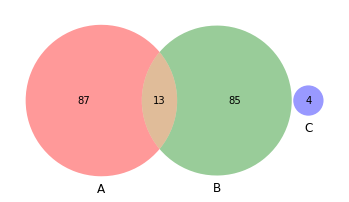

In [7]:
'''Vergleich zwischen drei Listen'''

def vergleich(list1, list2, list3):
    s1 = set(list1)
    s2 = set(list2)
    s3 = set(list3)
    s_all = set.intersection(s1, s2, s3)
    venn3([s1, s2, s3])
    return len(s_all) 

vergleich(liste1, liste2, liste3)

13

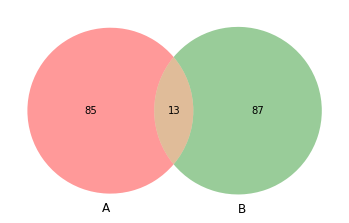

In [27]:
'Vergleich zwischen zwei oder drei Listen'

def vergleich2(list1, list2, list3):
    if list3:
        s1 = set(list1)
        s2 = set(list2)
        s3 = set(list3)
        s_all = set.intersection(s1, s2, s3)
        venn3([s1, s2, s3])
        return len(s_all)
    elif list2:
        s1 = set(list1)
        s2 = set(list2)
        s_all = set.intersection(s1, s2)
        venn2([s1, s2])
        return len(s_all)
    else:
        return 'Kein Vergleich'
    
vergleich2(liste2, liste1, False)